<a href="https://colab.research.google.com/github/yasykurrafii/PWA_2020/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

<h1> Importing All Module That we need </h1>

the important module that we need are :
* Numpy
* Pandas
* Matplotlib
* Tensorflow

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

# Data

This section will take the data with format .csv from url with module Pandas

Pandas is very useful module to take data, and manipulate it. It will helpfull to cleaning the data.

In [6]:
df_train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # Training set
df_eval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # Evaluation set

y_train = df_train.pop('survived') # Target Set for Training set
y_eval = df_eval.pop('survived') # Target Set for evalutation set

Training set and Evalutaion set are seperated that will be usefull to avoid overfitting when we train our model Machine Learning. Other trick to seperate the data into training set and test set is using <i>train_test_split</i> from module scikit-learn (<i>sklearn.model_selection</i>)

## Look Insight of data with Pandas

With Pandas we can look the data and find the insight like mean, std, etc.

In [7]:
df_train.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


<i>DataFrame.head()</i> is using to look the 5 first row of the data. We can look at the feature and find the path of the data.

In [8]:
df_train.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


<i>DataFrame.describe()</i> will give you the insight of the data. It is very usefull to look the mean, std and so on.

In [9]:
df_train.shape

(627, 9)

With <i>DataFrame.shape</i> we know this dataset has 627 rows with 9 columns

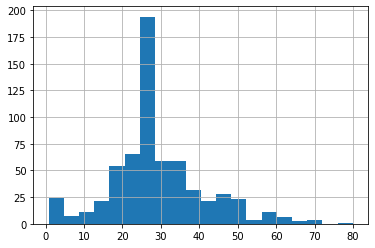

In [10]:
df_train.age.hist(bins = 20)

Nice, Pandas give us the graph of the data from <i>age</i> column in <i>df_train</i> dataset with <i>Histogram Plot with 20 bins</i>

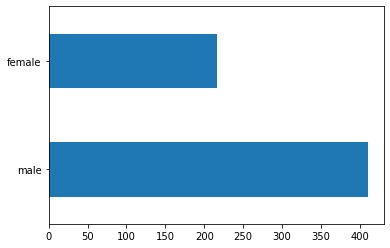

In [11]:
df_train.sex.value_counts().plot(kind = 'barh')

Interesting, with <i>.value_counts()</i> we count the total data for each unique value, in this example <i>.value_counts()</i> counts the total data from sex female and male. We can use <i>.plot()</i> with kind <strong>horizontal bar</strong>

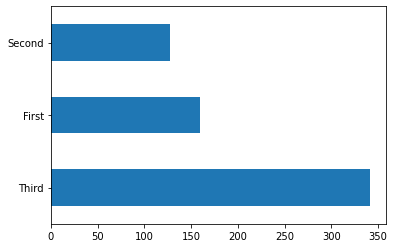

In [12]:
df_train['class'].value_counts().plot(kind = 'barh')

There are two ways to choose the feature from the dataset. First, with <i>dataset.feature</i> and Second, <i>dataset['feature']</i> .

Text(0.5, 0, '% Survive')

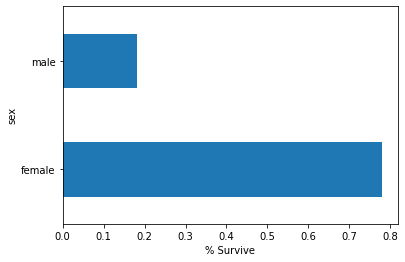

In [17]:
pd.concat([df_train, y_train], axis = 1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel('% Survive')

We Concat 2 dataframe, <i>df_train and y_train</i>, by grouping with <strong>sex</strong> and take the <i>mean</i> of <i>survived</i> by every <strong>sex</strong>.

Now, From this four graphs there are many information that we got:

1. Most of the Passengers are 20 to 30 years old
2. Most of the Passengers are male
3. Most of the Passengers are in the Third class
4. Female has more percentage to survive than male